In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = "cleanedPlayerData.xlsx"
nhl_data = pd.read_excel(file)

In [3]:
nhl_data.head()

,Rank,Player,Age,Position,Team,Games Played,Goals,Assists,Points,Plus Minus,...,Hart Trophy,Votes,Season,Player Name,Player ID,Goals / Time on Ice,Assists / Time on Ice,Points / Time on Ice,Hits / Time on Ice,Blocks / Time on Ice
0,695,Aaron Downey\downeaa01,34,RW,DET,4,1,1,2,0,...,0,0,2009,Aaron Downey,downeaa01,0.047619,0.047619,0.095238,0.523810,0.047619
1,667,Aaron Downey\downeaa01,33,RW,DET,56,0,3,3,0,...,0,0,2008,Aaron Downey,downeaa01,0.000000,0.011673,0.011673,0.307393,0.023346
2,708,Aaron Downey\downeaa01,32,RW,MTL,21,1,0,1,-6,...,0,0,2009,Aaron Downey,downeaa01,0.009524,0.000000,0.009524,0.000000,0.000000
3,708,Aaron Downey\downeaa01,32,RW,MTL,21,1,0,1,-6,...,0,0,2007,Aaron Downey,downeaa01,0.009524,0.000000,0.009524,0.000000,0.000000
4,1435,Aaron Downey\downeaa01,31,RW,TOT,42,3,4,7,2,...,0,0,2006,Aaron Downey,downeaa01,0.012766,0.017021,0.029787,0.000000,0.000000


In [4]:
for col in nhl_data.columns:
    print(col)

Rank
Player
Age
Position
Team
Games Played
Goals
Assists
Points
Plus Minus
Penalties In Minutes
Point Share
Even Strength
Power Play
Game Winning Goals
Even Strength Assists
Power Play Assists
Shots
Shots Percent
Time On Ice
Average Time On Ice
Blocks
Hit
Face Off Wins
Face Off Losses
Face off %
Hart Trophy
Votes
Season
Player Name
Player ID
Goals / Time on Ice
Assists / Time on Ice
Points / Time on Ice
Hits / Time on Ice
Blocks / Time on Ice


In [35]:
capped_age_data = nhl_data[nhl_data["Age"] <= 36]

In [36]:
forwards_data = capped_age_data[capped_age_data["Position"] != "D"]
defensemen_data = capped_age_data[capped_age_data["Position"] == "D"]

ageELC_df = forwards_data[forwards_data["Age"] <= 21]
ssn17_df = forwards_data[forwards_data["Season"] == 2017]
ssn04_df = forwards_data[forwards_data["Season"] == 24]

In [48]:
temp_df = ageELC_df.groupby(["Season"])

avg_goals = temp_df["Goals / Time on Ice"].mean()
avg_assists = temp_df["Assists / Time on Ice"].mean()
avg_pts = temp_df["Points / Time on Ice"].mean()
avg_hits = temp_df["Hits / Time on Ice"].mean()
avg_blocks = temp_df["Blocks / Time on Ice"].mean()
count = temp_df["Age"].count()
avg_shootperc = temp_df["Shots Percent"].mean()

ELC_by_season_df = pd.DataFrame({
    "Avg G/TOI" : avg_goals,
    "Avg A/TOI" : avg_assists,
    "Avg Pts/TOI" : avg_pts,
    "Avg Hits/TOI" : avg_hits,
    "Avg Blks/TOI" : avg_blocks,
    "Avg Shooting %" : avg_shootperc,
    "Num Players" : count
})

ELC_by_season_df.head()

,Avg G/TOI,Avg A/TOI,Avg Pts/TOI,Avg Hits/TOI,Avg Blks/TOI,Avg Shooting %,Num Players
Season,,,,,,,
2004,0.009890,0.012053,0.021943,0.000000,0.000000,10.336538,57
2006,0.012082,0.018887,0.030969,0.000000,0.000000,9.387755,52
2007,0.012411,0.015776,0.028187,0.000000,0.000000,9.338889,54
2008,0.010468,0.015076,0.025544,0.082617,0.024669,9.389831,59
2009,0.012798,0.015806,0.028604,0.042756,0.010439,9.817241,116


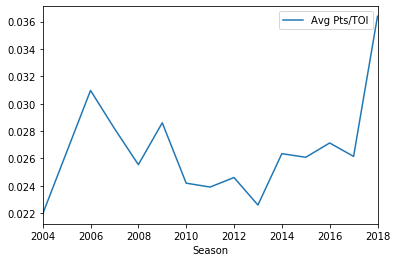

In [52]:
ELC_by_season_df.plot(kind="line", y = "Avg Pts/TOI")

In [39]:
temp_df = forwards_data.groupby(["Age"])

avg_goals = temp_df["Goals / Time on Ice"].mean()
avg_assists = temp_df["Assists / Time on Ice"].mean()
avg_pts = temp_df["Points / Time on Ice"].mean()
avg_hits = temp_df["Hits / Time on Ice"].mean()
avg_blocks = temp_df["Blocks / Time on Ice"].mean()
count = temp_df["Age"].count()

age_group_df = pd.DataFrame({
    "Avg G/TOI" : avg_goals,
    "Avg A/TOI" : avg_assists,
    "Avg Pts/TOI" : avg_pts,
    "Avg Hits/TOI" : avg_hits,
    "Avg Blks/TOI" : avg_blocks,
    "Num Players" : count
})

age_group_df.head(25)

,Avg G/TOI,Avg A/TOI,Avg Pts/TOI,Avg Hits/TOI,Avg Blks/TOI,Num Players
Age,,,,,,
18,0.011591,0.020017,0.031608,0.048559,0.020922,35
19,0.012280,0.015069,0.027349,0.056186,0.020503,125
20,0.010888,0.015241,0.026129,0.061274,0.021487,306
21,0.011348,0.014866,0.026213,0.070316,0.021959,445
22,0.011258,0.015334,0.026592,0.075017,0.021433,570
23,0.011422,0.015054,0.026476,0.073951,0.022960,674
24,0.011076,0.014818,0.025894,0.084761,0.024269,682
25,0.011114,0.014883,0.025998,0.085395,0.024290,660
26,0.011746,0.014997,0.026743,0.080941,0.022554,639


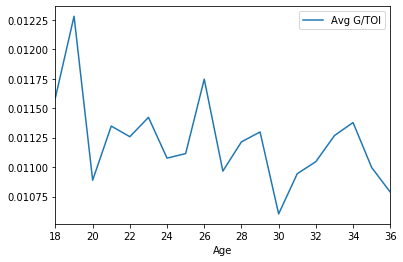

In [46]:
age_group_df.plot(kind="line", y = "Avg G/TOI")


In [41]:
temp_df = defensemen_data.groupby(["Age"])

avg_goals = temp_df["Goals / Time on Ice"].mean()
avg_assists = temp_df["Assists / Time on Ice"].mean()
avg_pts = temp_df["Points / Time on Ice"].mean()
avg_hits = temp_df["Hits / Time on Ice"].mean()
avg_blocks = temp_df["Blocks / Time on Ice"].mean()
count = temp_df["Age"].count()

d_age_group_df = pd.DataFrame({
    "Avg G/TOI" : avg_goals,
    "Avg A/TOI" : avg_assists,
    "Avg Pts/TOI" : avg_pts,
    "Avg Hits/TOI" : avg_hits,
    "Avg Blks/TOI" : avg_blocks,
    "Num Players" : count
})

d_age_group_df.head(25)

,Avg G/TOI,Avg A/TOI,Avg Pts/TOI,Avg Hits/TOI,Avg Blks/TOI,Num Players
Age,,,,,,
18,0.006376,0.007701,0.014077,0.129807,0.055526,5
19,0.003749,0.009967,0.013717,0.047669,0.046259,49
20,0.002516,0.009284,0.011800,0.039977,0.040818,125
21,0.003054,0.009404,0.012458,0.054552,0.052914,215
22,0.002765,0.010214,0.012979,0.057337,0.050047,283
23,0.003433,0.010287,0.013720,0.056831,0.050371,346
24,0.002951,0.010799,0.013750,0.063528,0.057372,339
25,0.003163,0.011145,0.014308,0.059478,0.054685,352
26,0.003148,0.010862,0.014010,0.060674,0.055920,344


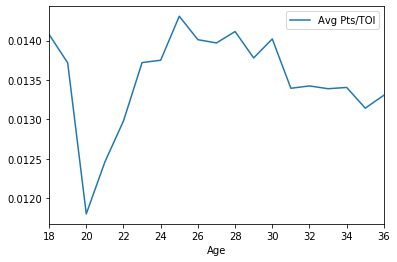

In [43]:
d_age_group_df.plot(kind="line", y = "Avg Pts/TOI")